<a href="https://colab.research.google.com/github/malyokhova/Physics/blob/lab-5.07/5_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [ ]:
lambd = [472, 505, 525, 588, 611]
U_0 = [0.65, 0.491, 0.447, 0.166, 0.095]
c = 3 * math.pow(10,8)
v = [c / (l * 1000) for l in lambd]
print("Значения частот v:", v)

Значения частот v: [635.5932203389831, 594.059405940594, 571.4285714285714, 510.2040816326531, 490.99836333878886]


In [ ]:
e = 1.6 * math.pow(10, -19)
T = [e * u for u in U_0]
print("Энергия электронов T:", T)

Энергия электронов T: [1.0400000000000001e-19, 7.856e-20, 7.152000000000001e-20, 2.6560000000000005e-20, 1.5200000000000002e-20]


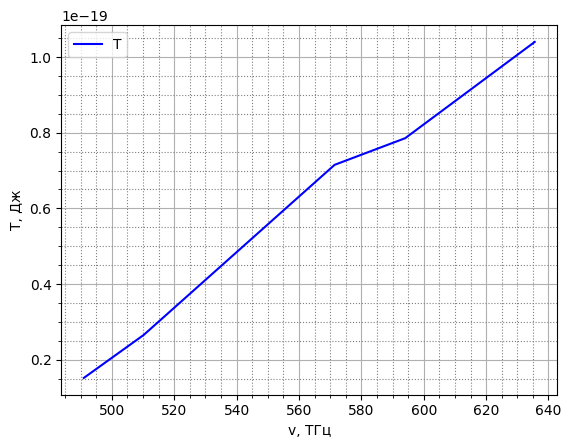

In [ ]:
plt.plot(v, T, color='blue', label="T")
plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')

plt.legend()
plt.ylabel("T, Дж")
plt.xlabel("v, ТГц")
plt.savefig('lab_5.07.jpg')
plt.show()

In [ ]:
def mnk(x, y):
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x_sum_kv = np.sum([i * i for i in x])
    xy_sum = np.sum(list(map(lambda i, t: i * t, x, y)))
    m = len(x)

    delta_matrix = [[x_sum_kv, x_sum],[x_sum, m]]
    delta = np.linalg.det(delta_matrix)
    delta_a_matrix = [[xy_sum, x_sum],[y_sum, m]]
    delta_a = np.linalg.det(delta_a_matrix)
    delta_b_matrix = [[x_sum_kv, xy_sum],[x_sum, y_sum]]
    delta_b = np.linalg.det(delta_b_matrix)

    a = delta_a / delta
    b = delta_b / delta

    x_ = np.linspace(min(x), max(x))
    y_ = a * x_ + b
    plt.minorticks_on()
    plt.grid(True, which='both')
    plt.grid(which='minor', color='gray', linestyle=':')
    plt.plot(x_, y_, color='green')
    plt.plot(x, y, color='blue')

    plt.xlabel("v, Гц")
    plt.ylabel("T, Дж")
    plt.savefig('lab5_07.jpg')
    plt.show()

    return a, b

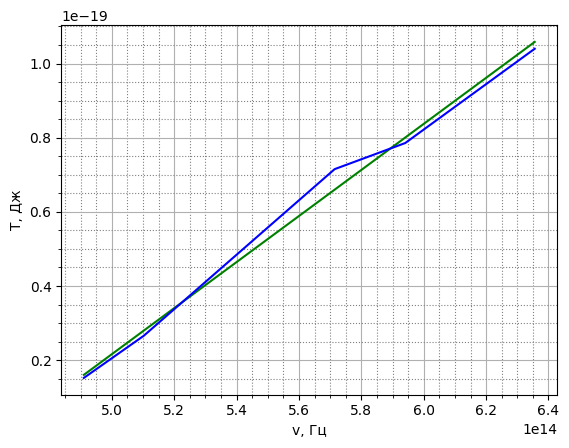

v_0, ТГц 465.2021076378992
h, Дж*с 6.211562173277091e-34
A, Дж 2.889631814732352e-19
A, эВ 1.80601988420772 => цезий


In [ ]:
v_ = [i * math.pow(10, 12) for i in v]
h, A = mnk(v_, T)
A = -A
v_0 = A / h
print("v_0, ТГц", v_0 / math.pow(10, 12))
print("h, Дж*с", h)
print("A, Дж", A)
A_eV = A / (1.6 * math.pow(10, -19))
print("A, эВ", A_eV, "=> цезий")

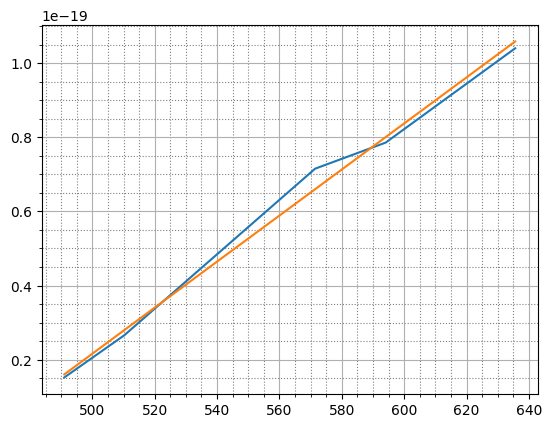

In [ ]:
h, A = np.polyfit(v, T, 1)
plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')
plt.plot(v, T)
y = [h * v_ + A for v_ in v]
plt.plot(v, y)
plt.show()

In [ ]:
U_rel_err = 0.005
lamb_meas_err = 0.5 * math.pow(10, -9)
lamb_act = 500 * math.pow(10, -9)
v_meas_err = 3 * math.pow(10, 12)
v_act = 3 * math.pow(10, 8) / lamb_act

h_rel_err = math.sqrt(math.pow(U_rel_err, 2) + math.pow(lamb_meas_err/lamb_act, 2))
A_rel_err = math.sqrt(math.pow(h_rel_err, 2) + math.pow(v_meas_err/v_act, 2))
print(h_rel_err, h_rel_err * 6.63 * math.pow(10, -34))
print(A_rel_err, A_rel_err * 1.94)
print()

0.005099019513592785 3.3806499375120165e-36
0.007141428428542851 0.013854371151373132
